In [1]:
function X_estim = filter_so(X)
    N1 = randn(512);
    N2 = rand(512);

    Y = (0.5 * N1) +  (2 * N2) .* X;
    
    figure;
    imshow(Y);
    title('Noisy Image','Color', 'blue')
    hold on;

    X1 = X(1:171, :);
    X2 = X(172:342, :);
    X3 = X(343:512, :);

    Y1 = Y(1:171, :);
    Y2 = Y(172:342, :);
    Y3 = Y(343:512, :);

    Z1 = Y1 .* Y1;
    Z2 = Y2 .* Y2;
    Z3 = Y3 .* Y3;

    % Aproximación de las Matrices de Covarianza
    
     s = 512;

    Exz1 = (1/s) * X1 * Z1';
    Exz2 = (1/s) * X2 * Z2';
    Exz3 = (1/s) * X3 * Z3';

    Exy1 = (1/s) * X1 * Y1';
    Exy2 = (1/s) * X2 * Y2';
    Exy3 = (1/s) * X3 * Y3';

    Eyy1 = ((1/s) * Y1) * Y1';
    Eyy2 = ((1/s) * Y2) * Y2';
    Eyy3 = ((1/s) * Y3) * Y3';

    Eyz1 = (1/s) * Y1 * Z1';
    Eyz2 = (1/s) * Y2 * Z2';
    Eyz3 = (1/s) * Y3 * Z3';

    Ezy1 = (1/s) * Z1 * Y1';
    Ezy2 = (1/s) * Z2 * Y2';
    Ezy3 = (1/s) * Z3 * Y3';

    Ezz1 = ((1/s) * Z1) * Z1';
    Ezz2 = ((1/s) * Z2) * Z2';
    Ezz3 = ((1/s) * Z3) * Z3';

    A1 = Ezz1 - Ezy1 * pinv(Eyy1) * Ezy1;
    A2 = Ezz2 - Ezy2 * pinv(Eyy2) * Ezy2;
    A3 = Ezz3 - Ezy3 * pinv(Eyy3) * Ezy3;

    B1 = (Exz1 - Exy1 * pinv(Eyy1) * Eyz1) * pinv(A1);
    B2 = (Exz2 - Exy2 * pinv(Eyy2) * Eyz2) * pinv(A2);
    B3 = (Exz3 - Exy3 * pinv(Eyy3) * Eyz3) * pinv(A3);

    F01_1 = (Exy1 - B1 * Ezy1) * pinv(Eyy1);
    F01_2 = (Exy2 - B2 * Ezy2) * pinv(Eyy2);
    F01_3 = (Exy3 - B3 * Ezy3) * pinv(Eyy3);

    F02_1 = B1;
    F02_2 = B2;
    F02_3 = B3;

    F12_1 = (F01_1 * Y1) + (F02_1 * pow2(Y1)); 
    F12_2 = (F01_2 * Y2) + (F02_2 * pow2(Y2)); 
    F12_3 = (F01_3 * Y3) + (F02_3 * pow2(Y3)); 

%     E1 = norm(X1 - F12_1);
%     E2 = norm(X2 - F12_2);
%     E3 = norm(X3 - F12_3);

    X_estim  = [F12_1; F12_2; F12_3];
end


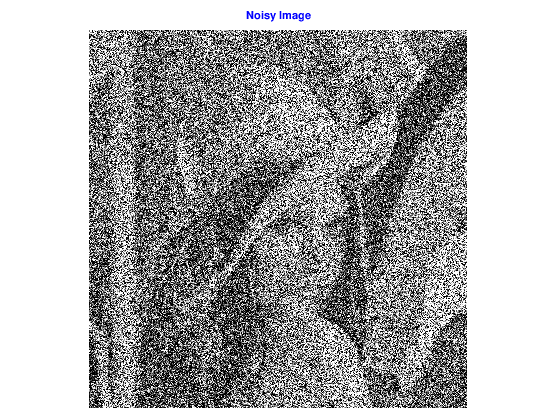

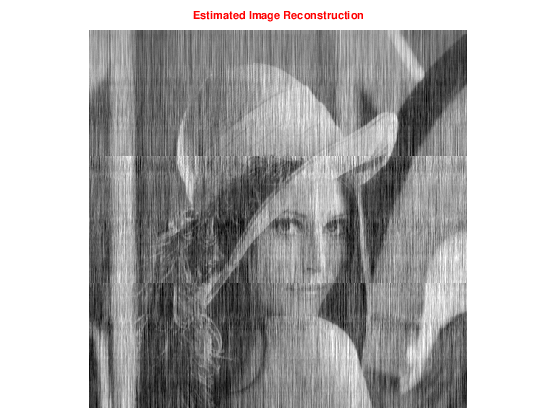

In [2]:
X = im2double(imread('lena512.png'));
X_estim = filter_so(X);

figure;
imshow(X_estim);
title('Estimated Image Reconstruction','Color', 'red')
hold on;